In [2]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Open the file
with open('FlySimOut.txt', 'r') as file:
    lines = file.readlines()

In [3]:
# Regex patterns to match the lines and capture the timestamps
pattern_send = r"GCS Send Timestamp: (\d+\.\d+)"
pattern_current = r"GCS Current Timestamp: (\d+\.\d+)"

# List to store all the timestamp differences
differences = []
timestamp_send = []
timestamp_current= []

# Iterate over the lines
for line in lines:
    # Search for the pattern "GCS Send Timestamp:"
    match_send = re.search(pattern_send, line)
    if match_send:
        # Extract the timestamp value
        timestamp_send.append(float(match_send.group(1)))

    # Search for the pattern "GCS Current Timestamp:"
    match_current = re.search(pattern_current, line)
    if match_current:
        # Extract the timestamp value
        timestamp_current.append(float(match_current.group(1)))


In [4]:
# Calculate the differences
for i in range(len(timestamp_current)):
    differences.append(timestamp_current[i] - timestamp_send[i])

In [5]:
start = differences[:74]
end = differences[74:]

x = timestamp_current[-1] - timestamp_current[84]
print(timestamp_current[-1], timestamp_current[84])
print("Total time difference: " + str(x) + " s")

meters = 185
print("Total distance difference: " + str(meters) + " m")

# Plot the differences
print(len(differences), len(end))


1703781729.222202 1703781472.358811
Total time difference: 256.86339116096497 s
Total distance difference: 185 m
613 539


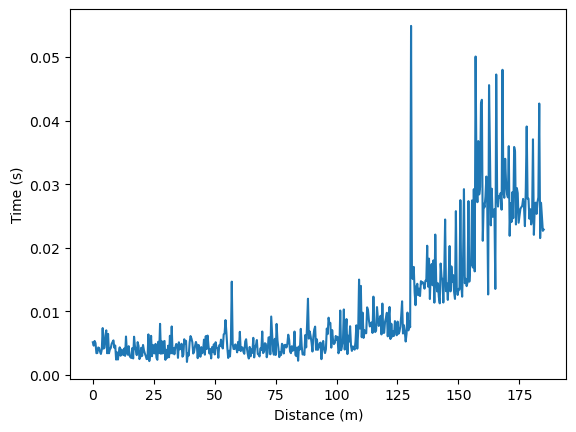

In [6]:
size = 578-74
y = np.linspace(0, meters, size)
plt.plot(y, end[:size])
plt.xlabel("Distance (m)")
plt.ylabel("Time (s)")
plt.show()


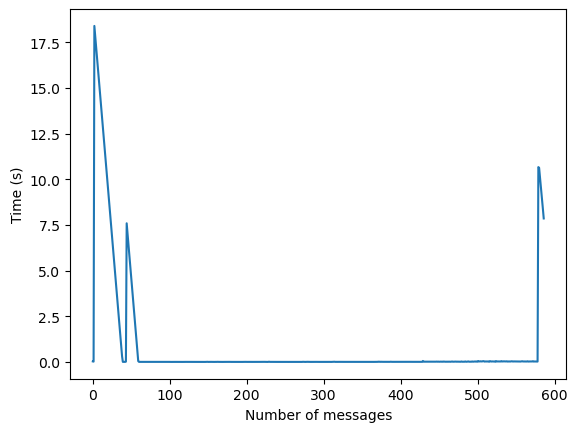

In [9]:
plt.plot(differences[:587])
plt.xlabel("Number of messages")
plt.ylabel("Time (s)")
plt.show()

In [8]:
# save the differences to a file
with open('differences.txt', 'w') as file:
    for item in differences:
        file.write("%s\n" % item)